In [1]:
import pandas as pd

In [2]:
import logging
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [3]:
import sys
sys.path.append('../scripts') 

In [4]:
from data_cleaning import load_data,handle_missing_values,remove_duplicates, correct_data_types, exploratory_data_analysis, merge_datasets, feature_engineering, visualize_new_features, preprocess_and_encode

In [5]:
# Load the datasets
logging.info("Loading datasets...")
fraud_data_path = '../data/Fraud_Data.csv'
ip_to_country_path = '../data/IpAddress_to_Country.csv'

2025-02-14 13:23:38,257 - INFO - Loading datasets...


In [6]:
fraud_data = load_data(fraud_data_path)
ip_to_country_data = load_data(ip_to_country_path)
logging.info('Data loaded sucessfully')

2025-02-14 13:23:38,835 - INFO - Data loaded sucessfully


In [7]:
# Apply data cleaning functions step by step
fraud_data = handle_missing_values(fraud_data)
ip_to_country_data = handle_missing_values(ip_to_country_data)
logging.info('Handled Missing data')
print(fraud_data.head())

2025-02-14 13:23:39,024 - INFO - Handled Missing data


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [8]:
fraud_data = correct_data_types(fraud_data)
logging.info("Corrected data types for fraud data\n")
print(fraud_data.head())

2025-02-14 13:23:39,276 - INFO - Corrected data types for fraud data



   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  signup_year  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0         2015   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0         2015   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1         2015   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0         2015   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0         2015   

   signup_month  signup_day  signup_hour  purchase_year  purchase_month  \
0             2          24        

In [9]:
# Assuming fraud_data is already loaded as a pandas DataFrame
fraud_data = remove_duplicates(fraud_data)
ip_to_country_data = remove_duplicates(ip_to_country_data)

logging.info("Removed duplicates from fraud_data and ip_to_country_data\n")

2025-02-14 13:23:39,534 - INFO - Removed duplicates from fraud_data and ip_to_country_data



In [10]:
print(type(fraud_data))  # Should be <class 'pandas.core.frame.DataFrame'>

if isinstance(fraud_data, pd.DataFrame):
    print(fraud_data.dtypes)  # Show column data types

<class 'pandas.core.frame.DataFrame'>
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
signup_year                int64
signup_month               int64
signup_day                 int64
signup_hour                int64
purchase_year              int64
purchase_month             int64
purchase_day               int64
purchase_hour              int64
dtype: object


In [11]:
print(type(fraud_data))  # Expected output: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


Data Summary:
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  signup_year   signup_month     signup_day  \
count  151112.000000     151112.0  151112.000000  151112.000000   
mean        0.093646       2015.0       4.147593      14.731060   
std         0.291336          0.0       2.256968       8.730886   
min         0.000000       2015.0       1.000000       1.000000   
25%         0.000000       20

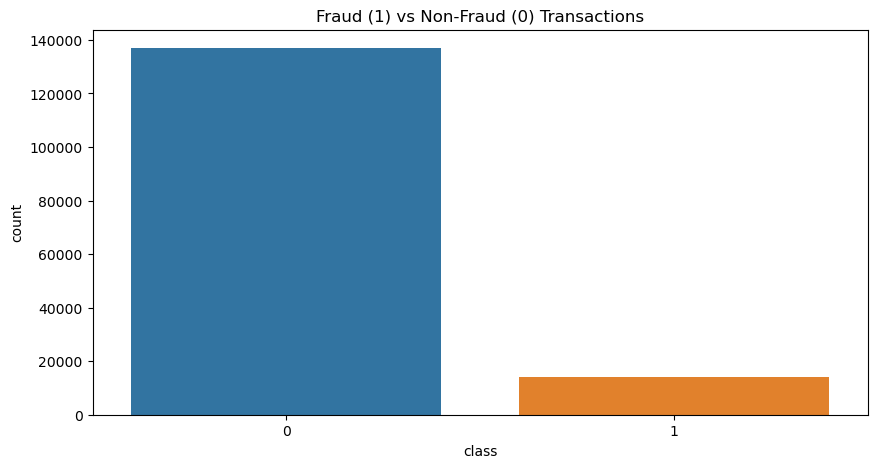

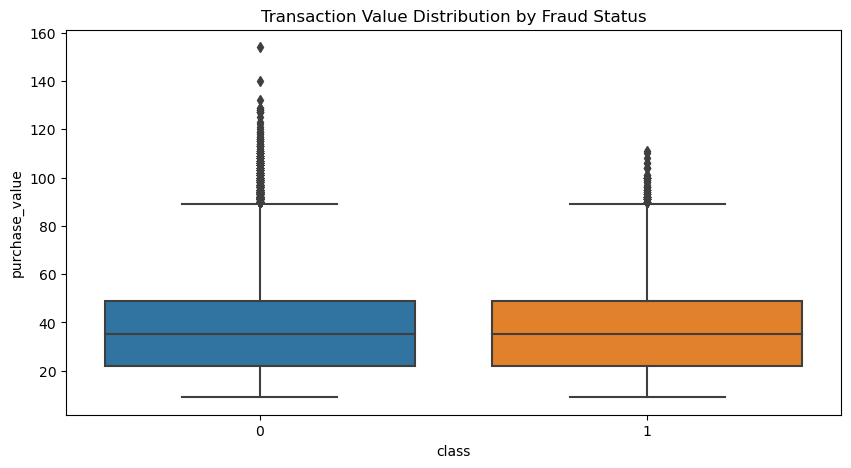

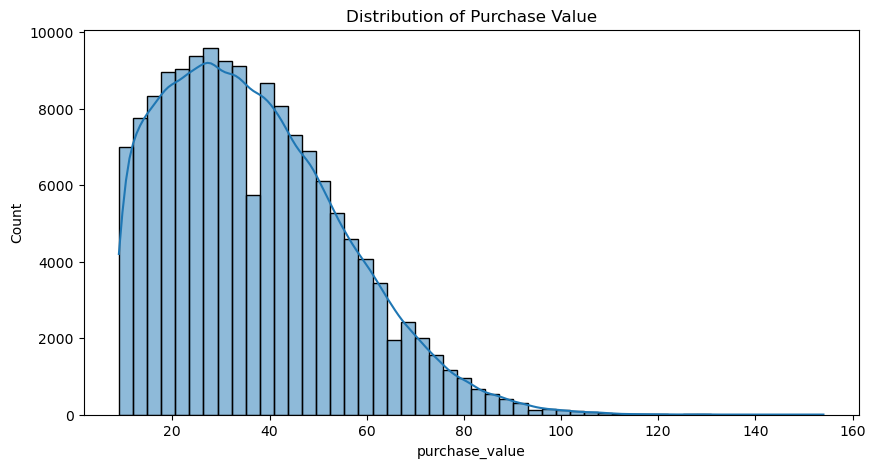

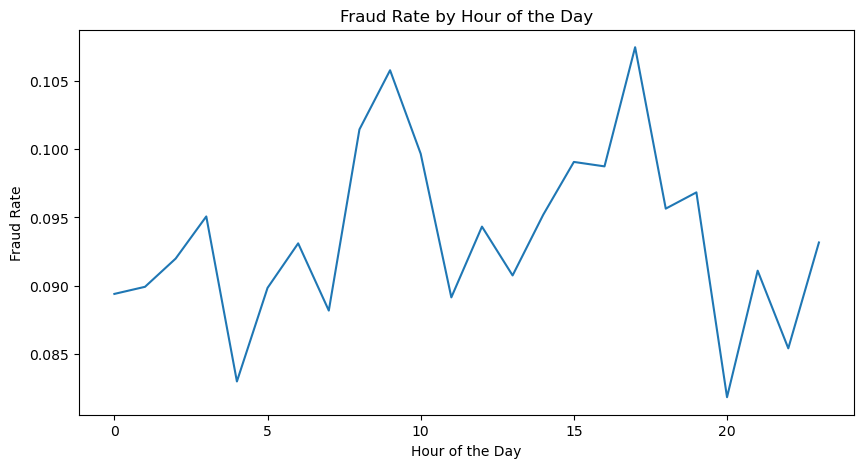

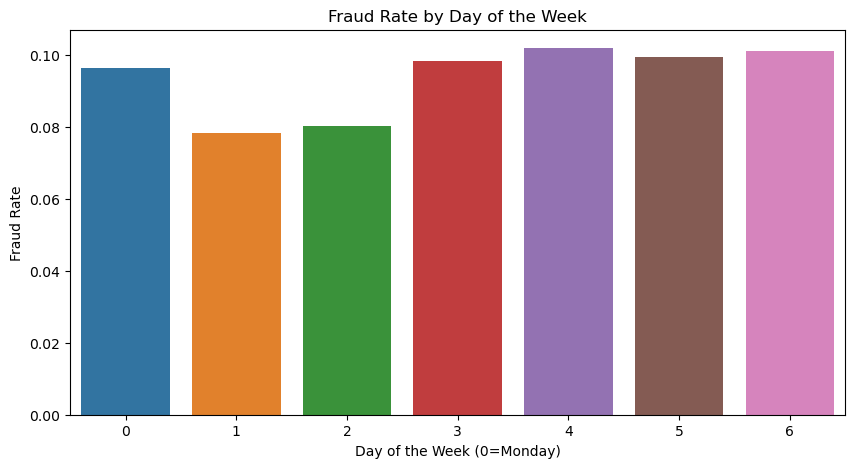

/home/elisha-a/week8/notebooks/../scripts/data_cleaning.py:90: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


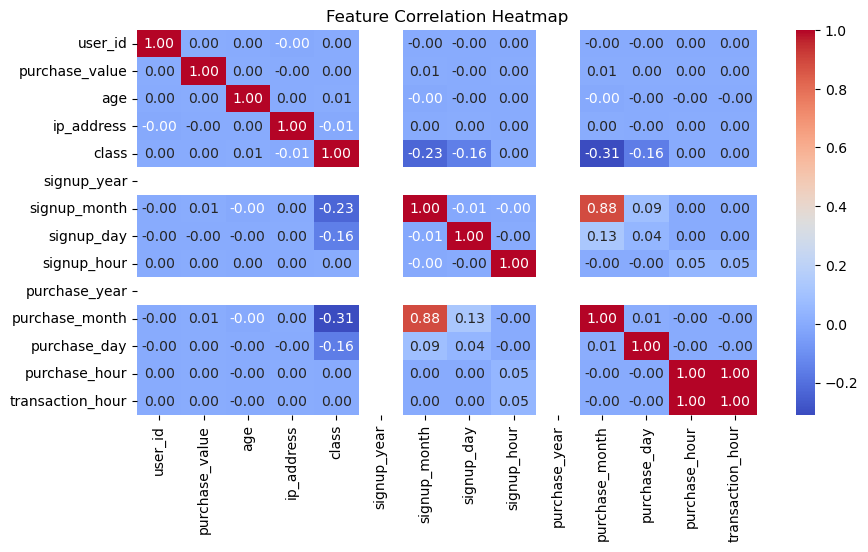

In [12]:
exploratory_data_analysis(fraud_data)

Type of fraud_data before feature engineering: <class 'pandas.core.frame.DataFrame'>


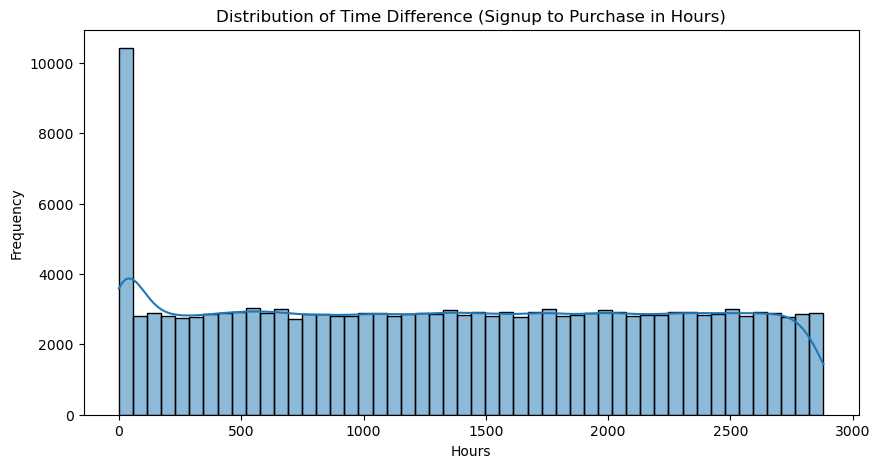

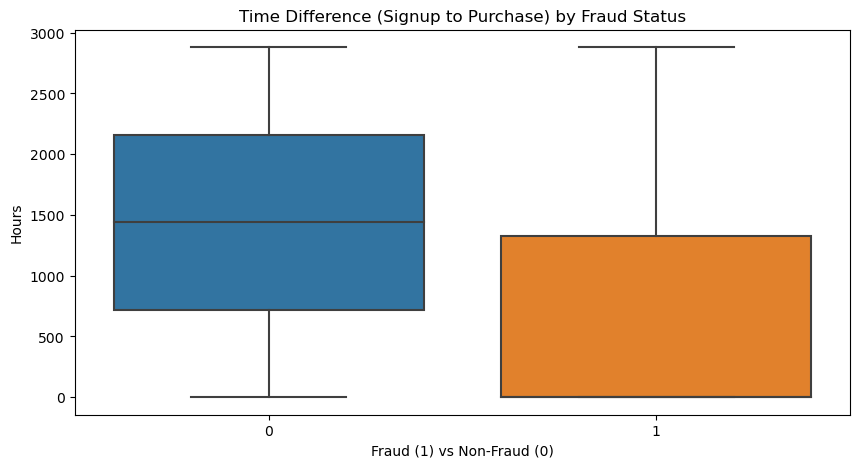

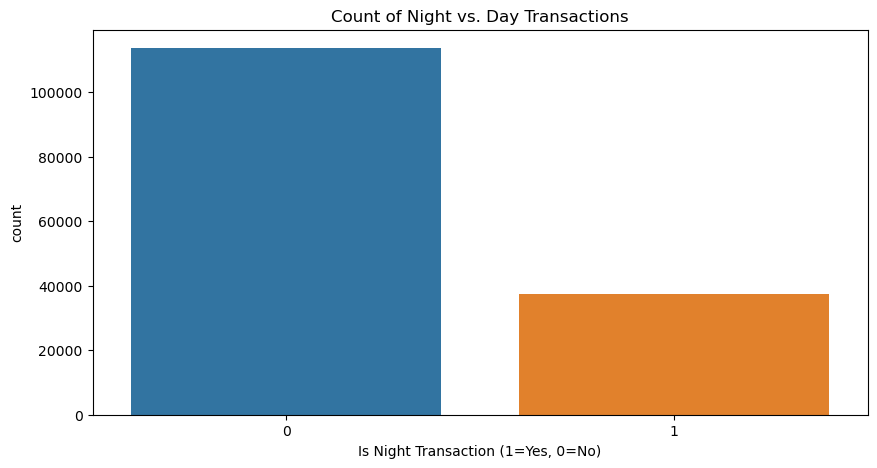

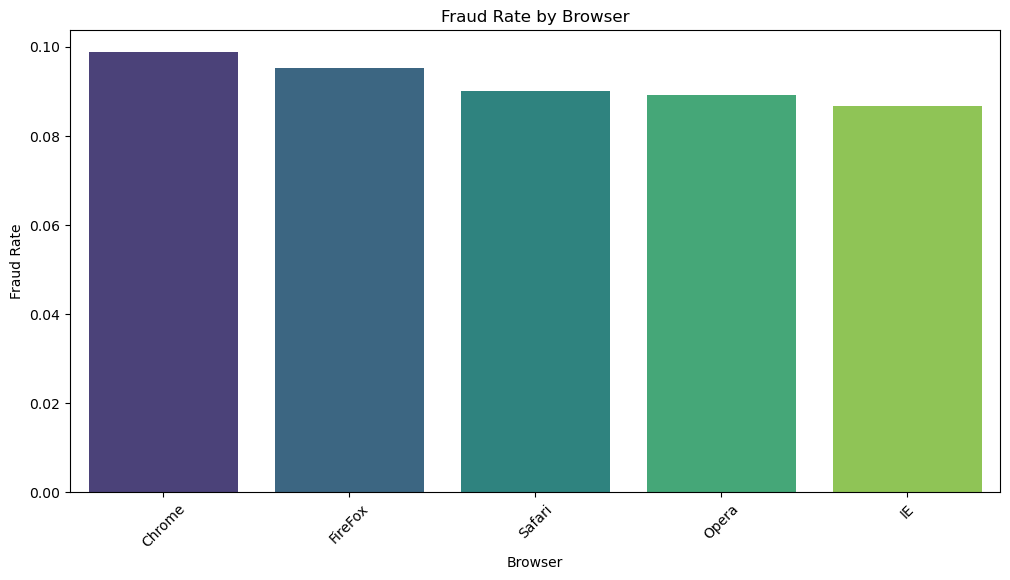

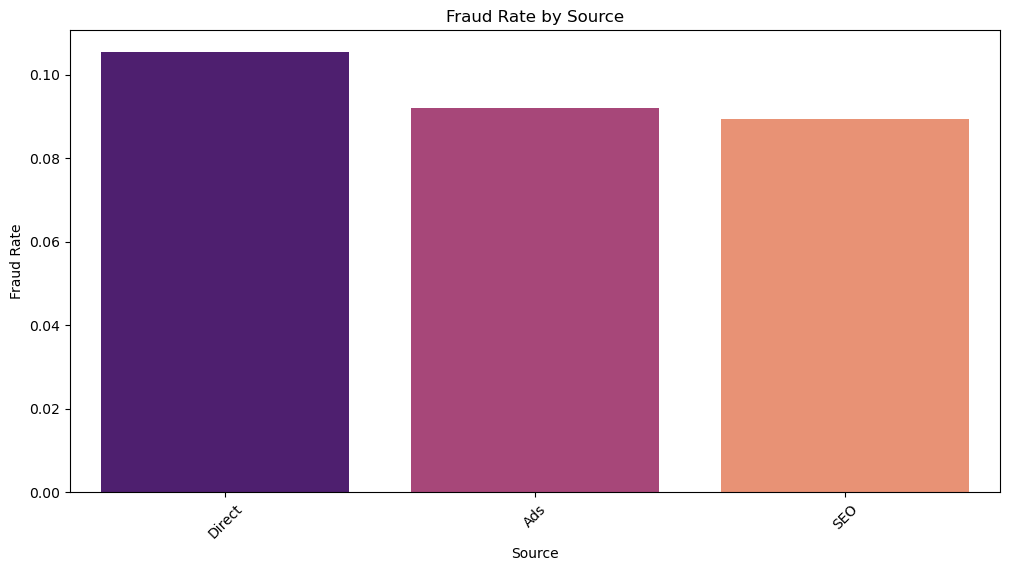

In [13]:
print("Type of fraud_data before feature engineering:", type(fraud_data))
fraud_data = feature_engineering(fraud_data)
visualize_new_features(fraud_data)  # This must come after feature engineering

In [14]:
fraud_data['signup_time'] = fraud_data['signup_time'].astype(int) / 10**9
fraud_data['purchase_time'] = fraud_data['purchase_time'].astype(int) / 10**9

In [15]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,purchase_year,purchase_month,purchase_day,purchase_hour,transaction_hour,transaction_day_of_week,time_diff_signup_purchase,is_night_transaction,fraud_rate_by_browser,fraud_rate_by_source
0,22058,1.424819e+09,1.429325e+09,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015,4,18,2,2,5,1251.856111,1,0.098792,0.089285
1,333320,1.433710e+09,1.433728e+09,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015,6,8,1,1,0,4.984444,1,0.098792,0.092066
2,1359,1.420138e+09,1.420138e+09,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015,1,1,18,18,3,0.000278,0,0.089227,0.089285
3,150084,1.430256e+09,1.430748e+09,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,2015,5,4,13,13,0,136.690278,0,0.090201,0.089285
4,221365,1.437463e+09,1.441824e+09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015,9,9,18,18,2,1211.516944,0,0.090201,0.092066


In [16]:
merged_data = merge_datasets(fraud_data,ip_to_country_data)

In [17]:
merged_data.isnull().sum()

user_id                      0
signup_time                  0
purchase_time                0
purchase_value               0
device_id                    0
source                       0
browser                      0
sex                          0
age                          0
ip_address                   0
class                        0
signup_year                  0
signup_month                 0
signup_day                   0
signup_hour                  0
purchase_year                0
purchase_month               0
purchase_day                 0
purchase_hour                0
transaction_hour             0
transaction_day_of_week      0
time_diff_signup_purchase    0
is_night_transaction         0
fraud_rate_by_browser        0
fraud_rate_by_source         0
country                      0
dtype: int64

In [18]:
merged_data = preprocess_and_encode(merged_data)


In [19]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,sex,age,ip_address,class,...,country_Unknown,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,22058,1.424819e+09,1.429325e+09,0.172414,26198186,2,1,0.362069,732758368,0,...,0,0,0,0,0,0,0,0,0,0
1,333320,1.433710e+09,1.433728e+09,0.048276,26361243,0,0,0.603448,350311387,0,...,0,0,0,0,0,0,0,0,0,0
2,1359,1.420138e+09,1.420138e+09,0.041379,94927985,2,1,0.603448,2621473820,1,...,0,0,0,0,0,0,0,0,0,0
3,150084,1.430256e+09,1.430748e+09,0.241379,92383162,2,1,0.396552,3840542443,0,...,1,0,0,0,0,0,0,0,0,0
4,221365,1.437463e+09,1.441824e+09,0.206897,87316915,0,1,0.465517,415583117,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Save the cleaned data to a new CSV file
logging.info("Saving the cleaned data to 'Preprocessed_Data.csv'...")
merged_data.to_csv('../data/Preprocessed_Data.csv', index=False)

logging.info("Data cleaning and preprocessing completed successfully.")

2025-02-14 13:40:04,337 - INFO - Saving the cleaned data to 'Preprocessed_Data.csv'...
2025-02-14 13:40:11,144 - INFO - Data cleaning and preprocessing completed successfully.
